In [2]:
print("Hello Project World")

Hello Project World


In [59]:
import pandas as pd

df = pd.read_csv("csv/dataset.csv")

df.head()

,date,price,promotion_flag,previous_demand,day_of_week,is_holiday,external_index,demand
0,2024-01-01,104.967142,1,129.466567,2,1,1.134936,129.466567
1,2024-01-02,98.617357,0,129.466567,3,0,1.151287,108.866460
2,2024-01-03,106.476885,0,108.866460,4,0,1.140761,83.537250
3,2024-01-04,115.230299,0,83.537250,5,0,1.113601,106.473362
4,2024-01-05,NaN,0,106.473362,6,0,1.204852,86.930582


In [60]:
df.rename(columns={"demand" : "today_sold_units",
                   "previous_demand" : "yesterday_sold_units"
                  }, inplace=True)

In [61]:
df.head()

,date,price,promotion_flag,yesterday_sold_units,day_of_week,is_holiday,external_index,today_sold_units
0,2024-01-01,104.967142,1,129.466567,2,1,1.134936,129.466567
1,2024-01-02,98.617357,0,129.466567,3,0,1.151287,108.866460
2,2024-01-03,106.476885,0,108.866460,4,0,1.140761,83.537250
3,2024-01-04,115.230299,0,83.537250,5,0,1.113601,106.473362
4,2024-01-05,NaN,0,106.473362,6,0,1.204852,86.930582


In [62]:
df.isna().sum()

date                    0
price                   5
promotion_flag          0
yesterday_sold_units    5
day_of_week             0
is_holiday              0
external_index          5
today_sold_units        0
dtype: int64

In [63]:
# Changing astypes from float to int

df["yesterday_sold_units"] = df["yesterday_sold_units"].round().astype("Int64")

print(df["yesterday_sold_units"].dtype)

df["today_sold_units"] = df["today_sold_units"].round().astype("Int64")

print(df["today_sold_units"].dtype)

Int64
Int64


In [64]:
df.head()

,date,price,promotion_flag,yesterday_sold_units,day_of_week,is_holiday,external_index,today_sold_units
0,2024-01-01,104.967142,1,129,2,1,1.134936,129
1,2024-01-02,98.617357,0,129,3,0,1.151287,109
2,2024-01-03,106.476885,0,109,4,0,1.140761,84
3,2024-01-04,115.230299,0,84,5,0,1.113601,106
4,2024-01-05,NaN,0,106,6,0,1.204852,87


In [65]:
df["price"] = df["price"].ffill()

In [66]:
df["yesterday_sold_units"] = df["yesterday_sold_units"].ffill()

In [67]:
df["external_index"] = df["external_index"].interpolate()

In [70]:
df.columns

Index(['date', 'price', 'promotion_flag', 'yesterday_sold_units',
       'day_of_week', 'is_holiday', 'external_index', 'today_sold_units'],
      dtype='object')

In [71]:
df.isna().sum()

date                    0
price                   0
promotion_flag          0
yesterday_sold_units    0
day_of_week             0
is_holiday              0
external_index          0
today_sold_units        0
dtype: int64

In [75]:
df.dtypes

date                     object
price                   float64
promotion_flag            int64
yesterday_sold_units      Int64
day_of_week               int64
is_holiday                int64
external_index          float64
today_sold_units          Int64
dtype: object

In [72]:
df.loc[df["today_sold_units"] < 0 ]

,date,price,promotion_flag,yesterday_sold_units,day_of_week,is_holiday,external_index,today_sold_units


In [78]:
# Detect outliers 

mean = df["today_sold_units"].mean()
std = df["today_sold_units"].std()

z_scores = (df["today_sold_units"] - mean) / std
outliers = df[abs(z_scores) > 3]
outliers

,date,price,promotion_flag,yesterday_sold_units,day_of_week,is_holiday,external_index,today_sold_units
86,2024-03-27,109.154021,0,84,4,0,1.207157,277
99,2024-04-09,97.654129,0,111,3,0,1.335564,323
102,2024-04-12,96.572855,1,111,6,0,1.122621,434


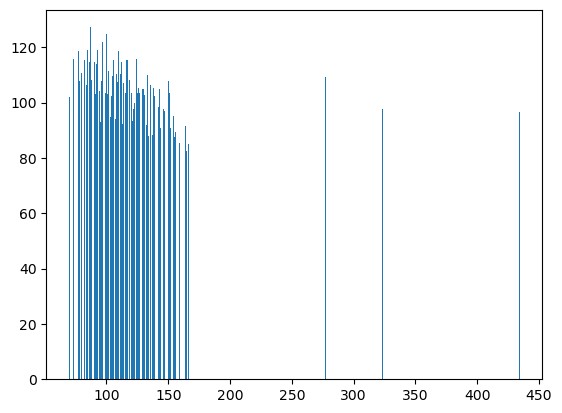

In [84]:
import matplotlib.pyplot as plt

plt.bar(df["today_sold_units"], df["price"])
plt.show()


In [85]:
df.columns

Index(['date', 'price', 'promotion_flag', 'yesterday_sold_units',
       'day_of_week', 'is_holiday', 'external_index', 'today_sold_units'],
      dtype='object')

In [86]:
df.head()

,date,price,promotion_flag,yesterday_sold_units,day_of_week,is_holiday,external_index,today_sold_units
0,2024-01-01,104.967142,1,129,2,1,1.134936,129
1,2024-01-02,98.617357,0,129,3,0,1.151287,109
2,2024-01-03,106.476885,0,109,4,0,1.140761,84
3,2024-01-04,115.230299,0,84,5,0,1.113601,106
4,2024-01-05,115.230299,0,106,6,0,1.204852,87


In [88]:
df.to_csv("csv/clean_dataset.csv", index=False)